Populating the interactive namespace from numpy and matplotlib


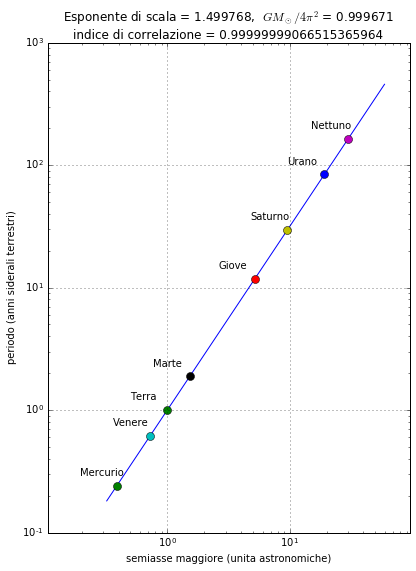

In [1]:
# Verifica della terza legge di Keplero: (periodo orbitale)**2 ~ (semiasse maggiore dell'orbita)**3
# La legge di scala è verificata riportando i dati in un grafico log-log
# Parametri orbitali:
# - distanza del pianeta dal Sole (unità astronomiche = distanza media tra Terra e Sole = 149 597 871 km)
# - periodo di rivoluzione (anni siderali terrestri)
# http://www.astronomynotes.com/tables/tablesb.htm

%pylab inline

d=23.9344696       # giorno siderale (h)
y=365.256363004    # giorni siderali / anno siderale

par={                                                   # parametri orbitali (semiasse maggiore, periodo)
'Mercurio' : ( 0.387 ,  87.969 / y ),
'Venere'   : ( 0.723 , 224.701 / y ), 
'Terra'    : ( 1.000 ,       y / y ) ,
'Marte'    : ( 1.524 , 686.98  / y ),
'Giove'    : ( 5.203 ,  11.862     ),
'Saturno'  : ( 9.537 ,  29.457     ),
'Urano'    : (19.191 ,  84.011     ),
'Nettuno'  : (30.069 , 164.79      )
}

from scipy.stats import linregress                       # importo il metodo dei minimi quadrati
vals=log(array(par.values()))                           # prendo i logaritmi dei parametri orbitali
m,q,r,p,s=linregress(vals)                               # minimi quadrati
                                                         # m = coefficiente angolare, q =  termine noto
                                                         # r = coefficiente di correlazione (misura la bontà del fit)
x=linspace(vals[:,0].min()*1.2,vals[:,0].max()*1.2)      # creo un vettore di valori possibili dei log dei semiassi maggiore

fig=figure(figsize=(6,8))                                # creo una figura
plot(exp(x),exp(m*x+q))                                  # disegno la retta interpolante
for key in par:                                         # disegno i punti sperimentali 
    x=par[key][0]                                       # semiasse maggiore
    y=par[key][1]                                       # periodo
    loglog(x,y,'o',markersize=8)                         # grafico doppio logaritmico
    text(0.5*x,1.2*y,key)                                # aggiungo una legenda per identificare i pianeti
xlabel('semiasse maggiore (unita astronomiche)')
ylabel('periodo (anni siderali terrestri)')
title('Esponente di scala = %f,  $GM_\odot/4\pi^2$ = %g\nindice di correlazione = %.20f'%(m,exp(-2*q),r))
axis('equal')                                            # utilizzo la stessa unità di misura su ascisse e ordinate
grid()
fig.tight_layout()


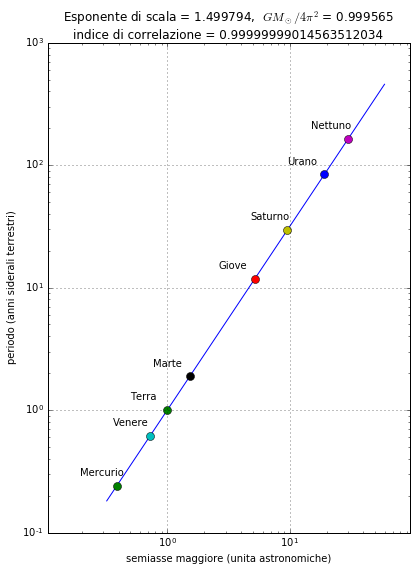

In [65]:
# Ripeto il conto moltiplicando i periodi di rivoluzione per il fattore correttivo sqrt(m/mu) con
# m : massa del pianeta, mu = M m / (M+m) : massa ridotta, M : massa del Sole
#
# La correzione non migliora però la qualità del fit
# Il valore dell'esponente di scala si avvicina un poco di più a 1.5
# Evidentemente altri effetti trascurati impediscono di verificare la legge con precisione superiore a 1/10000
#

massa={                                                  # masse dei pianeti (in unità di massa della Terrra)
'Mercurio' :   0.0553 ,
'Venere'   :   0.815  , 
'Terra'    :   1.0    ,
'Marte'    :   0.107  ,
'Giove'    : 317.83   ,
'Saturno'  :  95.159  ,
'Urano'    :  14.536  ,
'Nettuno'  :  17.147
}

massaSole  = 1.989e30                                    # [kg]
massaTerra = 5.972e24                                    # [kg]
M          = massaSole/massaTerra                        # massa del Sole in unità di massa della Terra

parmod={ key:(par[key][0],par[key][1]*sqrt(1.+massa[key]/M)) for key in par}
   
vals=log(array(parmod.values()))                         # prendo i logaritmi dei parametri orbitali
m,q,r,p,s=linregress(vals)                               # minimi quadrati; m = coeff. angolare, q =  termine noto
x=linspace(vals[:,0].min()*1.2,vals[:,0].max()*1.2)      # creo un vettore di valori possibili dei log dei semiassi maggiore

fig=figure(figsize=(6,8))                                # creo una figura
plot(exp(x),exp(m*x+q))                                  # disegno la retta interpolante
for key in par:                                         # disegno i punti sperimentali 
    x=par[key][0]                                       # semiasse maggiore
    y=par[key][1]                                       # periodo
    loglog(x,y,'o',markersize=8)                         # grafico doppio logaritmico
    text(0.5*x,1.2*y,key)                                # aggiungo una legenda per identificare i pianeti
xlabel('semiasse maggiore (unita astronomiche)')
ylabel('periodo (anni siderali terrestri)')
title('Esponente di scala = %f,  $GM_\odot/4\pi^2$ = %g\nindice di correlazione = %.20f'%(m,exp(-2*q),r))
axis('equal')                                            # utilizzo la stessa unità di misura su ascisse e ordinate
grid()
fig.tight_layout()
